# **Installing the required Dependencies**

In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'
# (add --user if you don't have permission)

#run 1st then click on restart runtime and then run this cell again

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-436dw77g
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-436dw77g
     |████████████████████████████████| 49 kB 6.4 MB/s 
     |████████████████████████████████| 74 kB 3.2 MB/s 
     |████████████████████████████████| 144 kB 46.8 MB/s 
     |████████████████████████████████| 130 kB 57.0 MB/s 
     |████████████████████████████████| 743 kB 56.5 MB/s 
     |████████████████████████████████| 721 kB 56.5 MB/s 
     |████████████████████████████████| 636 kB 49.9 MB/s 
     |████████████████████████████████| 112 kB 64.1 MB/s 
  Created wheel for detectron2: filename=detectron2-0.5-cp37-cp37m-linux_x86_64.whl size=5538313 sha256=bf99ee28bcf5d2fca683fe9c773b620531d0dcd46a3cd163fa8405a0ef3b1851
  Stored in directory: /tmp/pip-ephem-wheel-cache-erfe_ngr/wheels/07/dc/32/0322cb484dbefab8b9366bfedbaff5060ac7d149d69c27ca5d
  Created wheel for fvcore: filename=fvcore

In [ ]:
# install dependencies:
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc - version
# opencv is pre-installed on colab

# install detectron2: (colab has CUDA 10.1 + torch 1.6):
#Detectron2 is Facebook AI Research's next generation library that provides state-of-the-art detection and segmentation algorithms.
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

1.9.0+cu102 True
gcc: error: version: No such file or directory
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html


# **Importing the Libraries**

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()


# import some common libraries


import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow


# import some common detectron2 utilities


from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# **Detecting and Labelling an image**




# **Uploading an image**

In [ ]:
def read_file(filename):
  img = cv2.imread(filename)
  cv2_imshow(img)
  return img

Saving download.jpg to download (1).jpg


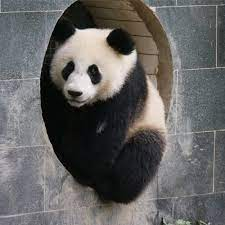

In [ ]:
uploaded = files.upload()
filename = next(iter(uploaded))
#The next() function returns the next item in an iterator.
#You can add a default return value, to return if the iterable has reached to its end.

img = read_file(filename)

# **Detecting & Labelling of the image**

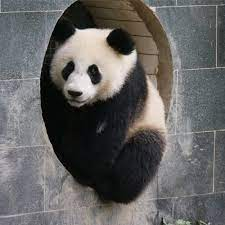

model_final_f10217.pkl: 178MB [00:09, 18.9MB/s]                           
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are relea

tensor([21], device='cuda:0')
Boxes(tensor([[ 37.6601,  19.2160, 169.3946, 207.9494]], device='cuda:0'))


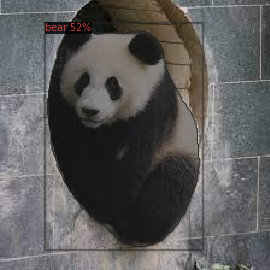

In [ ]:
#getting Image from COCO dataset
#instead of uploading the image we can also use this command
#!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = img
cv2_imshow(im)

#Creating a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)


# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

#Last and final step is to visualize our processed image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# **Cartooning the image**

# **Edge Masking**

In [ ]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

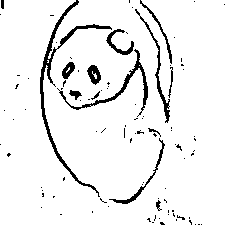

In [ ]:
line_size = 7
blur_value = 7

edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

# **REDUCING COLOUR PALETTE**

**Colour Quantization**

In [ ]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

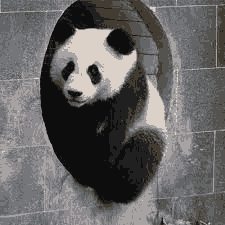

In [ ]:
total_color = 9

img = color_quantization(img, total_color)
cv2_imshow(img)

# **Bilateral Filtering**

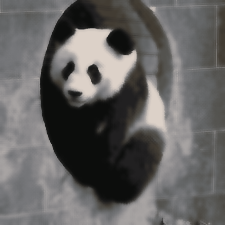

In [ ]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)
cv2_imshow(blurred)

# **COMBINING EDGE MASK WITH THE COLORED IMAGE**

**Adding Cartoon Effect**

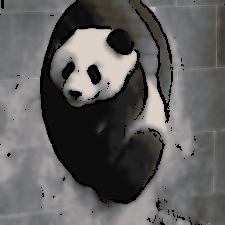

In [ ]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon)

**Filtering the Image:**

Applying Various filters to the image such as Guassian , sharpen and mean filters.

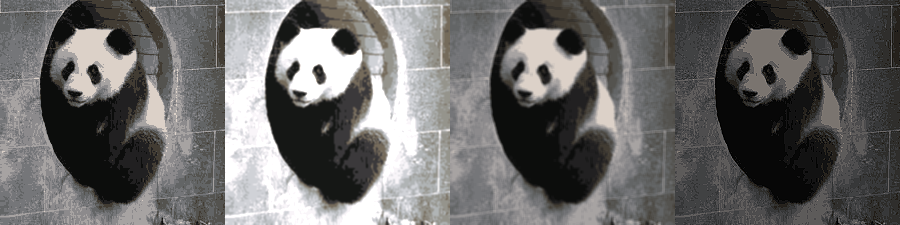

In [ ]:
gaussianBlurKernel = np.array(([[1, 2, 1], [2, 4, 2], [1, 2, 1]]), np.float32)/9
sharpenKernel = np.array(([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]), np.float32)/9
meanBlurKernel = np.ones((3, 3), np.float32)/9

gaussianBlur = cv2.filter2D(src=img, kernel=gaussianBlurKernel, ddepth=-1)
meanBlur = cv2.filter2D(src=img, kernel=meanBlurKernel, ddepth=-1)
sharpen = cv2.filter2D(src=img, kernel=sharpenKernel, ddepth=-1)

horizontalStack = np.concatenate((img, gaussianBlur, meanBlur, sharpen), axis=1)

cv2.imwrite("Output.jpg", horizontalStack)

cv2_imshow( horizontalStack)